In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

# Extract movies data from 5000 movie dataset

In [2]:
data = pd.read_csv("../dataset/movie_metadata.csv")
display(data.head(10))

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
print(data['title_year'].value_counts().sort_index())

1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2012.0    221
2013.0    237
2014.0    252
2015.0    226
2016.0    106
Name: title_year, Length: 91, dtype: int64


We conclude that we have movies from the year 1916 to 2016(a century of movie-data)\
To fetch more recent movies, we need other sources, which we will get back on to later.

In [4]:
print("The number of movies are:", data.shape[0], " with each movie having", data.shape[1]," characterstics.")

The number of movies are: 5043  with each movie having 28  characterstics.


Lets see how many movies were released per year

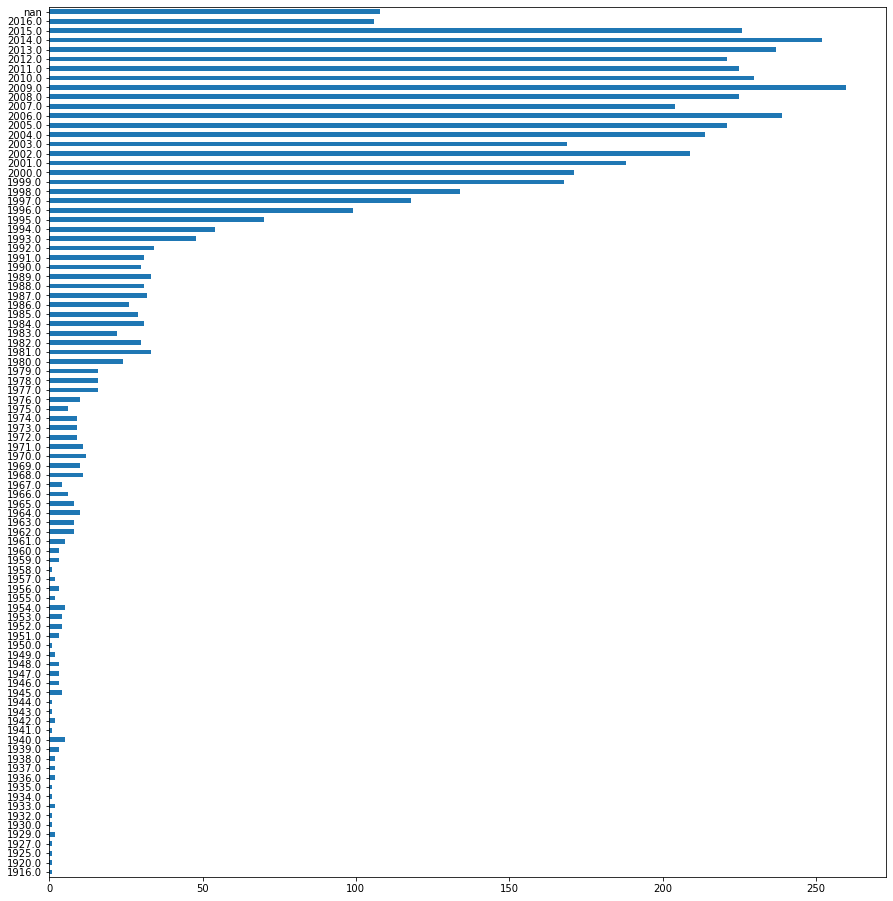

In [5]:
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(15, 16))
# plt.tight_layout()

Lets observe the main feature: **Movie Title**

In [6]:
print(data.movie_title[:10], "\n\n")
print((data.movie_title == 'Avatar').sum())
print((data.movie_title == 'Avatar\xa0').sum())

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
5                                         John Carter 
6                                        Spider-Man 3 
7                                             Tangled 
8                             Avengers: Age of Ultron 
9              Harry Potter and the Half-Blood Prince 
Name: movie_title, dtype: object 


0
1


Hence, while searching for a movie w.r.t. search parameter being the movie name itself, we need to be sure to include the end-of-sentence character sequence - **\xa0** at the end of each movie name that we want to query.


**\xa0** is actually non-breaking space in Latin1 (ISO 8859-1), also chr(160). You should replace it with a space.

In [7]:
# data = data.loc[:, ['']]
for x in data.columns:
    print(x)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


Pull out the important details from the data, which are actually of use to our website

In [8]:
data = data.loc[:, [
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'genres',
    'movie_title'
]]
display(data.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [9]:
for colName in data.columns:
    if colName.endswith("_name"):
        data[colName].replace(np.nan, 'unknown', inplace=True)

In [10]:
for colName in data.columns:
    if colName.endswith("_name"):
        print("Number of NaN values for", colName, "are", data[colName].isnull().sum())

Number of NaN values for director_name are 0
Number of NaN values for actor_1_name are 0
Number of NaN values for actor_2_name are 0
Number of NaN values for actor_3_name are 0


* genres are given as Action|Adventure|Comedy...
    * we need to replace this pipe character, to space, for ease of splitting
    
* lower case all Movie names

* remove the ending **\xa0** character from each movie name

In [11]:
data['genres'] = data['genres'].map(lambda x: x.replace("|", " "))

print("Movie title of the second movie before formatting:", data['movie_title'][1])
data['movie_title'] = data['movie_title'].str.lower() # lower-casing
# data['movie_title'] = data['movie_title'].apply(lambda x: x[:-1])
print("Movie title of the second movie after formatting:", data['movie_title'][1])

Movie title of the second movie before formatting: Pirates of the Caribbean: At World's End 
Movie title of the second movie after formatting: pirates of the caribbean: at world's end 


In [12]:
# create a combined list of the 3 main actors
data['comb'] = data['actor_1_name'] + ' ' + data['actor_2_name']+ ' ' + data['actor_3_name']+ ' ' + data['director_name']+ ' ' + data['genres']

In [13]:
display(data.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andr...
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action Adventure Romance,spider-man 3,J.K. Simmons James Franco Kirsten Dunst Sam Ra...
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musi...,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan G...
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Joh...
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure Family Fantasy Mystery,harry potter and the half-blood prince,Alan Rickman Daniel Radcliffe Rupert Grint Dav...


In [14]:
print(data.isnull().sum())    

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64


# Parse credits

In [15]:
credits = pd.read_csv("../dataset/archive/credits.csv")
display(credits.head(10))

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


3 columns only:
1. cast
2. crew(background crew, not the main acting cast of the film)
3. ID(movie ID)

# Parse movies metadata

In [16]:
meta = pd.read_csv("../dataset/archive/movies_metadata.csv")
display(meta.head(10))

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


* this another metadata is used, it contains information about all actors in the main cast and also the name of crew members.

* although it has movies upto 2020, as shown below, we only need,trust and rely on those upto 2017,thus we will filter out only them

In [17]:
meta['year'] = pd.to_datetime(meta['release_date'], errors='coerce')
meta['year'] = meta['year'].dt.year
print(meta['year'].value_counts().sort_index())

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64


In [18]:
new_meta = meta.loc[meta.year == 2017, ['genres', 'id', 'title', 'year']]
display(new_meta.head(10))

new_meta['id'] = new_meta['id'].astype(int)

# based on movie ID, merge the credits Dataframe with metadata
creditsMeta = pd.merge(new_meta, credits, on='id')

pd.set_option('display.max_colwidth', 75)

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
30994,"[{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...",279988,Extinction: Nature Has Evolved,2017.0
31994,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",326241,For Here or to Go?,2017.0
32531,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",354556,Guardians,2017.0
32732,"[{'id': 35, 'name': 'Comedy'}]",306943,The Outcasts,2017.0
33356,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",297762,Wonder Woman,2017.0


In [19]:
display(creditsMeta.head(10))

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
5,"[{'id': 53, 'name': 'Thriller'}, {'id': 12, 'name': 'Adventure'}]",279988,Extinction: Nature Has Evolved,2017.0,"[{'cast_id': 3, 'character': 'Professor John Howson', 'credit_id': '53b...","[{'credit_id': '53b4a061c3a3685eb7000232', 'department': 'Directing', '..."
6,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}]",326241,For Here or to Go?,2017.0,"[{'cast_id': 1, 'character': 'Vivek Pandit', 'credit_id': '58b338499251...","[{'credit_id': '54efa9bb9251417968006b3b', 'department': 'Directing', '..."
7,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 87...",354556,Guardians,2017.0,"[{'cast_id': 2, 'character': 'Arseniy / Arsus', 'credit_id': '5707c4399...","[{'credit_id': '5707c405925141708d0000ef', 'department': 'Directing', '..."
8,"[{'id': 35, 'name': 'Comedy'}]",306943,The Outcasts,2017.0,"[{'cast_id': 0, 'character': 'Jodi Watson', 'credit_id': '547b4244c3a36...","[{'credit_id': '5558894dc3a3687772008e31', 'department': 'Art', 'gender..."
9,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",297762,Wonder Woman,2017.0,"[{'cast_id': 0, 'character': 'Wonder Woman / Diana Prince', 'credit_id'...","[{'credit_id': '56a93fca9251417dcb001e9f', 'department': 'Writing', 'ge..."


In [20]:
print(creditsMeta['genres'].dtypes)

import ast
# convert string to list

creditsMeta['genres'] = creditsMeta['genres'].map(lambda x: ast.literal_eval(x))
creditsMeta['cast'] = creditsMeta['cast'].map(lambda x: ast.literal_eval(x))
creditsMeta['crew'] = creditsMeta['crew'].map(lambda x: ast.literal_eval(x))

print(creditsMeta['genres'].dtypes)
print(creditsMeta['genres'])

object
object
0      [{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...
1      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...
2      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...
3      [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...
4      [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...
                                          ...                                    
526              [{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
527    [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...
528    [{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...
529    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...
530                                                                            []
Name: genres, Length: 531, dtype: object


In [21]:
# change the genre Science Fiction to Sci-Fi

def make_genresList(x):
    gen = []
    st = " "
    scifi = 'Sci-Fi'
    for i in x:
        if i.get('name') == 'Science Fiction':
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

* New column added that has space separated genre-names
* initially the genres were in the form of key-value pairs in a genre-dictionary-entry for each movie

In [22]:
creditsMeta['genres_list'] = creditsMeta['genres'].map(lambda x: make_genresList(x))
print(creditsMeta['genres_list'])

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object


In [23]:
def get_actor1(x):
    cast = []
    for i in x:
        cast.append(i.get('name'))
    if cast == []:
        return np.NaN
    else:
        return cast[0]

creditsMeta['actor_1_name'] = creditsMeta['cast'].map(lambda x: get_actor1(x))

In [24]:
def get_actor2(x):
    cast = []
    for i in x:
        cast.append(i.get('name'))
    if len(cast) < 2 :
        return np.NaN
    else:
        return cast[1]

creditsMeta['actor_2_name'] = creditsMeta['cast'].map(lambda x: get_actor2(x))

In [25]:
def get_actor3(x):
    cast = []
    for i in x:
        cast.append(i.get('name'))
    if len(cast) < 3 :
        return np.NaN
    else:
        return cast[2]

creditsMeta['actor_3_name'] = creditsMeta['cast'].map(lambda x: get_actor3(x))

In [26]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return st.join(dt)

creditsMeta['director_name'] = creditsMeta['crew'].map(lambda x: get_directors(x))

In [27]:
creditsMeta = creditsMeta.loc[:, [
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'genres_list',
    'title'    
]]
display(creditsMeta.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
5,Adam Spinks,Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Thriller Adventure,Extinction: Nature Has Evolved
6,Rucha Humnabadkar,Ali Fazal,Melanie Chandra,Omi Vaidya,Drama Comedy,For Here or to Go?
7,Sarik Andreasyan,Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Action Fantasy Sci-Fi,Guardians
8,Peter Hutchings,Victoria Justice,Eden Sher,Ashley Rickards,Comedy,The Outcasts
9,Patty Jenkins,Gal Gadot,Chris Pine,Robin Wright,Action Adventure Fantasy,Wonder Woman


Now combine the 2016 movies data,i.e. data from 'movie_metadata.csv', i.e. 5000 movie dataset with the above credits-data

In [28]:
creditsMeta.isnull().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [29]:
creditsMeta.dropna(how='any', inplace=True)

# important step for merge, all columns should have same name and dtype
creditsMeta = creditsMeta.rename(columns={
    'genres_list': 'genres',
    'title': 'movie_title'
})

print(creditsMeta.isnull().sum())

display(creditsMeta.head(10))

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
5,Adam Spinks,Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Thriller Adventure,Extinction: Nature Has Evolved
6,Rucha Humnabadkar,Ali Fazal,Melanie Chandra,Omi Vaidya,Drama Comedy,For Here or to Go?
7,Sarik Andreasyan,Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Action Fantasy Sci-Fi,Guardians
8,Peter Hutchings,Victoria Justice,Eden Sher,Ashley Rickards,Comedy,The Outcasts
9,Patty Jenkins,Gal Gadot,Chris Pine,Robin Wright,Action Adventure Fantasy,Wonder Woman


In [30]:
# lowercase the movie title, as was done for the 5000 movie dataset
creditsMeta['movie_title'] = creditsMeta['movie_title'].str.lower()
creditsMeta['comb'] = creditsMeta['actor_1_name'] + ' ' + creditsMeta['actor_2_name']+ ' ' + creditsMeta['actor_3_name']+ ' ' + creditsMeta['director_name']+ ' ' + creditsMeta['genres']

display(creditsMeta.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
5,Adam Spinks,Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Thriller Adventure,extinction: nature has evolved,Ben Loyd-Holmes Sarah Mac Neil Newbon Adam Spinks Thriller Adventure
6,Rucha Humnabadkar,Ali Fazal,Melanie Chandra,Omi Vaidya,Drama Comedy,for here or to go?,Ali Fazal Melanie Chandra Omi Vaidya Rucha Humnabadkar Drama Comedy
7,Sarik Andreasyan,Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Action Fantasy Sci-Fi,guardians,Anton Pampushnyy Sanzhar Madiyev Sebastien Sisak Sarik Andreasyan Actio...
8,Peter Hutchings,Victoria Justice,Eden Sher,Ashley Rickards,Comedy,the outcasts,Victoria Justice Eden Sher Ashley Rickards Peter Hutchings Comedy
9,Patty Jenkins,Gal Gadot,Chris Pine,Robin Wright,Action Adventure Fantasy,wonder woman,Gal Gadot Chris Pine Robin Wright Patty Jenkins Action Adventure Fantasy


In [31]:
df_2016_2017 = data.append(creditsMeta)
print(df_2016_2017.shape, data.shape, creditsMeta.shape)

(5501, 7) (5043, 7) (458, 7)


In [32]:
df_2016_2017.drop_duplicates(subset='movie_title', keep='last', inplace=True)
display(df_2016_2017.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action Adventu...
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musical Romance,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan Greno Adventure Animation ...
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Johansson Joss Whedon Action...
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure Family Fantasy Mystery,harry potter and the half-blood prince,Alan Rickman Daniel Radcliffe Rupert Grint David Yates Adventure Family...
10,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,Action Adventure Sci-Fi,batman v superman: dawn of justice,Henry Cavill Lauren Cohan Alan D. Purwin Zack Snyder Action Adventure S...


# Extracting 2018 movies from Wikipedia

In [33]:
url = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"

# read the month wise table in the above link
df1 = pd.read_html(url, header=0)[2]
df2 = pd.read_html(url, header=0)[3]
df3 = pd.read_html(url, header=0)[4]
df4 = pd.read_html(url, header=0)[5]

df = df1.append(
    df2.append(
        df3.append(df4,ignore_index=True), 
        ignore_index=True
    ),
    ignore_index=True
)

display(df.head(10))

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6]
5,JANUARY,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",[7]
6,JANUARY,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[8]
7,JANUARY,12,Freak Show,IFC Films,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",[9]
8,JANUARY,12,Humor Me,Shout! Factory / Shout! Studios,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",[10]
9,JANUARY,12,Vazante,Music Box Films,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,[11]


In the above link, you should notice that no **genres** are present for any of the movies in that table.\
Hence, here comes the use of [TMDB](https://www.themoviedb.org/)

In [34]:
from dotenv import load_dotenv
from tmdbv3api import TMDb
import json
import requests

load_dotenv(verbose=True)
tmdb = TMDb()
tmdb.api_key = os.getenv("API_KEY")

In [35]:
from tmdbv3api import Movie
tmdb_movie = Movie()

import time

# dynamically fill in the movie ID and api_key inside the function
url = "https://api.themoviedb.org/3/movie/{}?api_key={}"

def get_genre(x):
    genres = []
    try:
        result = tmdb_movie.search(x)
        movie_id = result[0].id
        response = requests.get(url.format(movie_id, tmdb.api_key))
        time.sleep(0.5)
        data_json = response.json()
        if data_json["genres"]:
            genre_str = " "
            for x in data_json["genres"]:
                genres.append(x['name'])
            return genre_str.join(genres)
        else:
            return np.NaN
    except:
        return np.NaN

In [36]:
df['Genre'] = df['Title'].map(lambda x: get_genre(str(x)))
display(df.head(10))

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,Genre
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Mystery Horror Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],NaN
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],Action Thriller
5,JANUARY,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",[7],Thriller Action Crime
6,JANUARY,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[8],NaN
7,JANUARY,12,Freak Show,IFC Films,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",[9],Comedy Drama
8,JANUARY,12,Humor Me,Shout! Factory / Shout! Studios,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",[10],Comedy
9,JANUARY,12,Vazante,Music Box Films,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,[11],Drama


The cast and crew entries are in the form of ; separated key-value pairs\
To fetch the director names, the following preprocessing is done

In [37]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

df_2018 = df[['Title', 'Cast and crew', 'Genre']]
df_2018['director_name'] =  df_2018['Cast and crew'].map(lambda x: get_director(x))
display(df_2018.head(10))

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Title,Cast and crew,Genre,director_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Mystery Horror Thriller,Adam Robitel
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama,Lauren Wolkstein
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",NaN,Simon West
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western,Warwick Thornton
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller,Jaume Collet-Serra
5,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",Thriller Action Crime,Babak Najafi
6,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,NaN,Brett Donowho
7,Freak Show,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",Comedy Drama,Trudie Styler
8,Humor Me,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",Comedy,Sam Hoffman
9,Vazante,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,Drama,Daniela Thomas


In [38]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

def get_actor2(x):
    if len(x.split("screenplay); ")[-1].split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])
    
def get_actor3(x):
    if len(x.split("screenplay); ")[-1].split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])
    
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

display(df_2018.head(10))

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Title,Cast and crew,Genre,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Mystery Horror Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",NaN,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
5,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal (screenplay);...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Billy Brown,Danny Glover
6,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,NaN,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
7,Freak Show,"Trudie Styler (director); Patrick J. Clifton, Beth Rigazio (screenplay)...",Comedy Drama,Trudie Styler,Alex Lawther,Abigail Breslin,Bette Midler
8,Humor Me,"Sam Hoffman (director/screenplay); Jemaine Clement, Elliott Gould, Ingr...",Comedy,Sam Hoffman,Jemaine Clement,Elliott Gould,Ingrid Michaelson
9,Vazante,Daniela Thomas (director/screenplay); Beto Amaral (screenplay); Adriano...,Drama,Daniela Thomas,Adriano Carvalho,Luana Nastas,NaN


In [39]:
df_2018 = df_2018.rename(columns={'Title': 'movie_title'})
df_2018 = df_2018.loc[:, [
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'Genre',
    'movie_title'
]]
display(df_2018.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Mystery Horror Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,NaN,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,The Commuter
5,Babak Najafi,Taraji P. Henson,Billy Brown,Danny Glover,Thriller Action Crime,Proud Mary
6,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,NaN,Acts of Violence
7,Trudie Styler,Alex Lawther,Abigail Breslin,Bette Midler,Comedy Drama,Freak Show
8,Sam Hoffman,Jemaine Clement,Elliott Gould,Ingrid Michaelson,Comedy,Humor Me
9,Daniela Thomas,Adriano Carvalho,Luana Nastas,NaN,Drama,Vazante


In [40]:
df_2018['actor_2_name'].replace(np.nan, 'unknown', inplace=True)
df_2018['actor_3_name'].replace(np.nan, 'unknown', inplace=True)
df_2018['Genre'].replace(np.nan, 'unknown', inplace=True)

df_2018['movie_title'] = df_2018['movie_title'].str.lower()
df_2018['comb'] = df_2018['actor_1_name'] + ' ' + df_2018['actor_2_name'] + ' ' + df_2018['actor_3_name'] + ' ' + df_2018['director_name'] + ' ' + df_2018['Genre']
display(df_2018.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Mystery Horror Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Mystery Horror Thri...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thr...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,unknown,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West unknown
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thriller
5,Babak Najafi,Taraji P. Henson,Billy Brown,Danny Glover,Thriller Action Crime,proud mary,Taraji P. Henson Billy Brown Danny Glover Babak Najafi Thriller Action ...
6,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,unknown,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho unknown
7,Trudie Styler,Alex Lawther,Abigail Breslin,Bette Midler,Comedy Drama,freak show,Alex Lawther Abigail Breslin Bette Midler Trudie Styler Comedy Drama
8,Sam Hoffman,Jemaine Clement,Elliott Gould,Ingrid Michaelson,Comedy,humor me,Jemaine Clement Elliott Gould Ingrid Michaelson Sam Hoffman Comedy
9,Daniela Thomas,Adriano Carvalho,Luana Nastas,unknown,Drama,vazante,Adriano Carvalho Luana Nastas unknown Daniela Thomas Drama


# Extracting 2019 and 2020 movies from Wikipedia

In [41]:
def fetchDF(url):
    # read the month wise table in the above link
    df1 = pd.read_html(url, header=0)[3]    
    df2 = pd.read_html(url, header=0)[4]
    df3 = pd.read_html(url, header=0)[5]
    df4 = pd.read_html(url, header=0)[6]

    df = df1.append(
        df2.append(
            df3.append(df4,ignore_index=True), 
            ignore_index=True
        ),
        ignore_index=True
    )
    df['Genre'] = df['Title'].map(lambda x: get_genre(str(x)))
    df_year = df[['Title', 'Cast and crew', 'Genre']]
    df_year['director_name'] =  df_year['Cast and crew'].map(lambda x: get_director(x))
    
    df_year['actor_1_name'] = df_year['Cast and crew'].map(lambda x: get_actor1(x))
    df_year['actor_2_name'] = df_year['Cast and crew'].map(lambda x: get_actor2(x))
    df_year['actor_3_name'] = df_year['Cast and crew'].map(lambda x: get_actor3(x))
    
    df_year = df_year.rename(columns={'Title': 'movie_title'})
    df_year = df_year.loc[:, [
        'director_name',
        'actor_1_name',
        'actor_2_name',
        'actor_3_name',
        'Genre',
        'movie_title'
    ]]
    
    df_year['actor_2_name'].replace(np.nan, 'unknown', inplace=True)
    df_year['actor_3_name'].replace(np.nan, 'unknown', inplace=True)
    df_year['Genre'].replace(np.nan, 'unknown', inplace=True)

    df_year['movie_title'] = df_year['movie_title'].str.lower()
    df_year['comb'] = df_year['actor_1_name'] + ' ' + df_year['actor_2_name'] + ' ' + df_year['actor_3_name'] + ' ' + df_year['director_name'] + ' ' + df_year['Genre']
    
    return df_year

In [42]:
url_2019 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
url_2020 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

df_2019 = fetchDF(url_2019)
df_2020 = fetchDF(url_2020)

/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/laferrari/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [43]:
display(df_2019.head(10))
print("\n\n\n\n")
display(df_2020.head(10))

,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Thriller Action Mystery Adventure Horror,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Thriller Acti...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
5,Jeffrey Nachmanoff,Keanu Reeves,unknown,unknown,Thriller Science Fiction,replicas,Keanu Reeves unknown unknown Jeffrey Nachmanoff Thriller Science Fiction
6,Batán Silva,Natalia Dyer,Kyra Sedgwick,Tim Daly,Drama Family Thriller Science Fiction,after darkness,Natalia Dyer Kyra Sedgwick Tim Daly Batán Silva Drama Family Thriller S...
7,M. Night Shyamalan,James McAvoy,Bruce Willis,Samuel L. Jackson,Thriller Drama Science Fiction,glass,James McAvoy Bruce Willis Samuel L. Jackson M. Night Shyamalan Thriller...
8,Vicky Jewson,Noomi Rapace,Sophie Nélisse,Indira Varma,Action Thriller,close,Noomi Rapace Sophie Nélisse Indira Varma Vicky Jewson Action Thriller
9,Henry Dunham,James Badge Dale,Brian Geraghty,unknown,Drama Thriller Mystery,the standoff at sparrow creek,James Badge Dale Brian Geraghty unknown Henry Dunham Drama Thriller Mys...


,director_name,actor_1_name,actor_2_name,actor_3_name,Genre,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,unknown,the grudge,Andrea Riseborough Demián Bichir John Cho Nicolas Pesce unknown
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Ho...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Drama Thr...
4,Andrew Desmond,Freya Tingley,Simon Abkarian,Rutger Hauer,Horror Thriller Mystery,the sonata,Freya Tingley Simon Abkarian Rutger Hauer Andrew Desmond Horror Thrille...
5,Daniel Farrands,Mena Suvari,Nick Stahl,Taryn Manning,unknown,the murder of nicole brown simpson,Mena Suvari Nick Stahl Taryn Manning Daniel Farrands unknown
6,Adil El Arbi and Bilall Fallah,Will Smith,Martin Lawrence,Vanessa Hudgens,Thriller Action Crime,bad boys for life,Will Smith Martin Lawrence Vanessa Hudgens Adil El Arbi and Bilall Fall...
7,Stephen Gaghan,Robert Downey Jr.,Antonio Banderas,Michael Sheen,Comedy Fantasy Adventure Family,dolittle,Robert Downey Jr. Antonio Banderas Michael Sheen Stephen Gaghan Comedy ...
8,Tyler Perry,Tyler Perry (director); Crystal R. Fox,Phylicia Rashad,Bresha Webb,Thriller,a fall from grace,Tyler Perry (director); Crystal R. Fox Phylicia Rashad Bresha Webb Tyle...
9,Guy Ritchie,Matthew McConaughey,Charlie Hunnam,Henry Golding,Action Crime Comedy,the gentlemen,Matthew McConaughey Charlie Hunnam Henry Golding Guy Ritchie Action Cri...


In [44]:
print(df_2019.isnull().sum(), "\n\n\n", df_2020.isnull().sum())

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
Genre            0
movie_title      0
comb             0
dtype: int64 


 director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
Genre            0
movie_title      0
comb             0
dtype: int64


# After appending

In [45]:
df = df_2018.append(df_2019.append(df_2020, ignore_index=True), ignore_index=True)
df.rename(columns={"Genre": "genres"}, inplace=True)
newDf = df_2016_2017.append(df, ignore_index=True)

print(newDf.shape)

(6115, 7)


In [48]:
from unicodedata import normalize


for col in newDf.columns:
    newDf[col] = newDf[col].map(lambda x: normalize('NFKD', str(x)).strip())

In [52]:
newDf.to_csv("../dataset/main_data.csv", index=False)
display(newDf.head(15))
print((newDf.movie_title == 'avatar\xa0').sum())
print(df_2016_2017.isnull().sum())

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andrew Stanton Action Adventu...
6,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musical Romance,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan Greno Adventure Animation ...
7,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Johansson Joss Whedon Action...
8,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure Family Fantasy Mystery,harry potter and the half-blood prince,Alan Rickman Daniel Radcliffe Rupert Grint David Yates Adventure Family...
9,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,Action Adventure Sci-Fi,batman v superman: dawn of justice,Henry Cavill Lauren Cohan Alan D. Purwin Zack Snyder Action Adventure S...


0
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64


# Sentiment Analysis of reviews

1. open `../dataset/reviews.txt`

2. 1 = positive review, 0 - negative review

In [53]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score, accuracy_score

import pickle

dataset = pd.read_csv("../dataset/reviews.txt", sep='\t', names=['Reviews', 'Comments'])
display(dataset.head(10))

stopset = set(stopwords.words('english'))

vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('transform.pkl', 'wb'))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = naive_bayes.MultinomialNB()
clf.fit(x_train, y_train)

print(accuracy_score(y_test, clf.predict(x_test))*100)

pickle.dump(clf, open('nlp_model.pkl', 'wb'))

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
5,1,that's not even an exaggeration ) and at midnight we went to Wal-Mart t...
6,1,"I loved the Da Vinci Code, but now I want something better and differen..."
7,1,"i thought da vinci code was great, same with kite runner."
8,1,The Da Vinci Code is actually a good movie...
9,1,I thought the Da Vinci Code was a pretty good book.


97.47109826589595
